In [18]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.0 MB 5.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.0 MB 7.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/11.0 MB 7.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 8.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.0 MB 9.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 9.0 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/11.0 MB 9.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/11.0 MB 9.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.0 MB 9.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 9.9 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\sw771\appdata\local\programs\python\python312\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import pandas
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
# Assuming your data is loaded into a DataFrame called 'df'
print(df.dtypes)

# Screenshot this output along with your code


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [11]:
# Import pandas
import pandas as pd

# Check if the columns 'id' and 'Unnamed: 0' exist before trying to drop them
columns_to_drop = ['id', 'Unnamed: 0']
columns_in_df = [col for col in columns_to_drop if col in df.columns]

# Drop only the columns that exist
if columns_in_df:
    df.drop(columns_in_df, axis=1, inplace=True)

# Get the statistical summary
summary = df.describe()
print(summary)



              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [3]:
# Count unique values for the 'floors' column
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)




        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


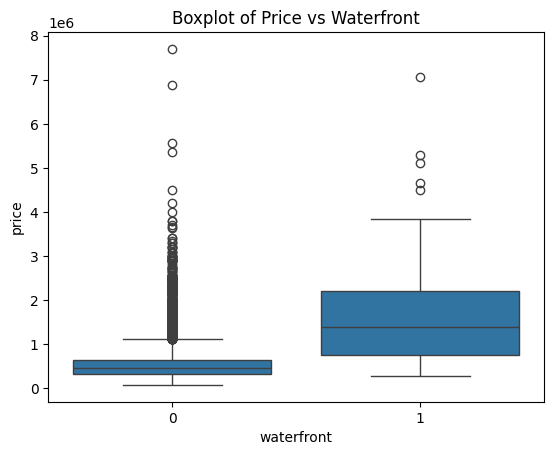

In [14]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price based on waterfront view
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of Price vs Waterfront')
plt.show()




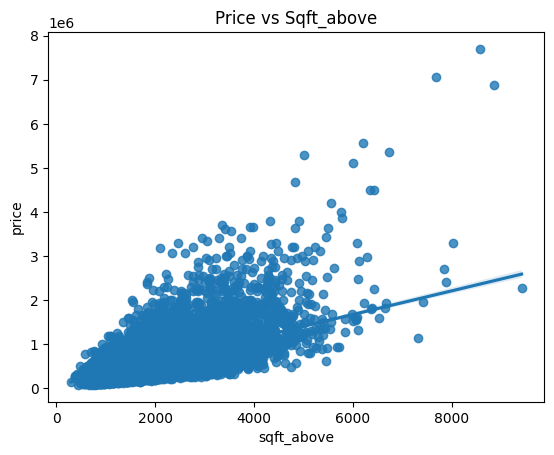

In [15]:
# Create a regplot to check the correlation between 'sqft_above' and 'price'
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Price vs Sqft_above')
plt.show()




In [19]:
# Import linear regression
from sklearn.linear_model import LinearRegression

# Create the linear regression model
lm = LinearRegression()

# Fit the model with 'sqft_living' and 'price'
X = df[['sqft_living']]
y = df['price']
lm.fit(X, y)

# Calculate R^2
r_squared = lm.score(X, y)
print(f'R^2: {r_squared}')




R^2: 0.4928532179037931


In [20]:
# List of features for the model
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 
            'sqft_living15', 'sqft_above', 'grade', 'sqft_living']

# Fit the model with these features
X_multi = df[features]
lm.fit(X_multi, y)

# Calculate R^2
r_squared_multi = lm.score(X_multi, y)
print(f'R^2: {r_squared_multi}')




R^2: 0.6577151058279324


In [21]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling, polynomial transformation, and linear regression
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_multi, y)

# Calculate R^2
r_squared_pipeline = pipeline.score(X_multi, y)
print(f'R^2: {r_squared_pipeline}')



R^2: 0.750723145584162


In [22]:
# Import Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=0)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Calculate R^2 using the test data
r_squared_ridge = ridge_model.score(X_test, y_test)
print(f'R^2 (Ridge): {r_squared_ridge}')




R^2 (Ridge): 0.651600842183649


In [23]:
# Perform polynomial transform on both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression on the polynomial-transformed data
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(X_train_poly, y_train)

# Calculate R^2 using the test data
r_squared_ridge_poly = ridge_model_poly.score(X_test_poly, y_test)
print(f'R^2 (Polynomial Ridge): {r_squared_ridge_poly}')




R^2 (Polynomial Ridge): 0.7157016558325879
